In [26]:
import pandas as pd
import numpy as np # linear algebra
import scipy as sp 
import nltk

In [27]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
pd_data=pd.read_csv("Reviews.csv")

In [29]:
pd_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [30]:
pd_data = pd_data[:10000]

In [31]:
pd_data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [52]:
UserIds = pd_data["UserId"]
scores = pd_data["Score"]
ProfileNames = pd_data["ProfileName"]


In [41]:
pd_data[pd_data.ProfileName == 'c2'].head(1000)
    

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
143,144,B001GVISJW,A1Z54EM24Y40LL,c2,0,0,5,1269129600,Great for the kids!,If you are looking for a less messy version of...
3587,3588,B004X8TK9W,A1Z54EM24Y40LL,c2,1,1,5,1338249600,AWESOME!,I may be dating myself here a bit but I rememb...
4993,4994,B000FA398U,A1Z54EM24Y40LL,c2,3,3,5,1203206400,Best for oyster soup!,Try these first for all your seafood soups and...
6371,6372,B000084EKO,A1Z54EM24Y40LL,c2,0,0,3,1090800000,Not any different than regular Friskies,I honestly cannot say that I saw any differenc...
6372,6373,B000084EKA,A1Z54EM24Y40LL,c2,0,0,4,1090972800,Not their best...,I think 9 Lives does a better job on this vari...
6373,6374,B000084EKB,A1Z54EM24Y40LL,c2,0,0,4,1091059200,Great food!,This version is ground. NOt my current cat's ...
6374,6375,B000084EKC,A1Z54EM24Y40LL,c2,1,1,5,1090972800,Great food for all cats!,"According to my cat, this stuff is just great...."
6375,6376,B000084EKD,A1Z54EM24Y40LL,c2,1,1,2,1090972800,Needs improved,I haven't had a cat yet that liked this one. ...
6380,6381,B000084EKG,A1Z54EM24Y40LL,c2,2,2,5,1090972800,Awesome food!,This is my cat's favorite one. He just licks ...
6382,6383,B000084EK8,A1Z54EM24Y40LL,c2,2,2,3,1090972800,Not the favorite in our house,Once or twice a year for a little variety and ...


In [77]:
pd_data[pd_data.ProfileName == 'c2'].Score

143     5
3587    5
4993    5
6371    3
6372    4
6373    4
6374    5
6375    2
6380    5
6382    3
6385    1
6393    3
6394    5
6395    5
6396    4
8028    3
8222    4
Name: Score, dtype: int64

In [84]:
b=(pd_data[pd_data.ProfileName == 'c2'].Score)
List=[5,5,5,3,4,4,5,2,5,3,1,3,5,5,4,3,4]
a = {}
for ii in List:
    if List.count(ii)>=0:
        a[ii] = List.count(ii)
print(a)


{5: 7, 3: 4, 4: 4, 2: 1, 1: 1}


In [91]:
#x = np.arange(6)
#y = np. a[ii]
x =[1,2,3,4,5]
y =[1,1,4,4,7]

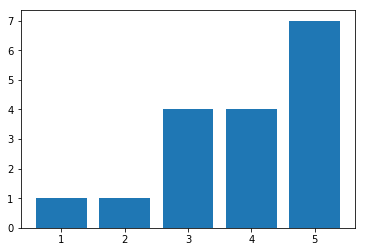

In [92]:
plt.bar(x,y)
plt.show()

In [51]:
print("Score count","    ","Score  mean")
print (pd_data[pd_data.ProfileName == 'c2'].Score.count(),"        ",pd_data[pd_data.ProfileName == 'c2'].Score.mean())


Score count      Score  mean
17          3.8823529411764706


In [71]:
for i in range(10000):
   a=pd_data[pd_data.ProfileName == ProfileNames[i]].count()
   print(i,"  ",a["Score"])

0    1
1    1
2    1
3    2
4    1
5    1
6    1
7    1
8    1
9    1
10    2
11    2
12    1
13    1
14    4
15    1
16    1
17    1
18    2
19    3
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    2
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    2
47    1
48    1
49    1
50    1
51    1
52    1
53    1
54    1
55    1
56    1
57    1
58    1
59    1
60    1
61    1
62    1
63    1
64    1
65    1
66    1
67    1
68    1
69    1
70    1
71    1
72    2
73    1
74    1
75    1
76    1
77    2
78    1
79    3
80    1
81    1
82    1
83    1
84    1
85    1
86    1
87    1
88    2
89    1
90    1
91    1
92    1
93    1
94    1
95    1
96    1
97    1
98    1
99    1
100    1
101    1
102    2
103    1
104    1
105    1
106    1
107    1
108    1
109    6
110    1
111    1
112    1
113    1
114    1
115    1
116    1
117    1
118    1
119    1
120    1
121    1
122    1
123

936    1
937    1
938    2
939    1
940    1
941    1
942    1
943    1
944    2
945    4
946    1
947    1
948    1
949    1
950    1
951    1
952    1
953    1
954    1
955    1
956    1
957    1
958    1
959    1
960    1
961    1
962    1
963    1
964    1
965    1
966    1
967    1
968    3
969    1
970    1
971    1
972    1
973    1
974    1
975    1
976    1
977    1
978    1
979    1
980    1
981    1
982    1
983    1
984    1
985    1
986    1
987    1
988    1
989    1
990    1
991    1
992    1
993    1
994    1
995    1
996    1
997    1
998    1
999    1
1000    1
1001    1
1002    1
1003    2
1004    1
1005    1
1006    11
1007    2
1008    1
1009    1
1010    1
1011    1
1012    1
1013    1
1014    1
1015    1
1016    1
1017    1
1018    1
1019    1
1020    1
1021    1
1022    1
1023    1
1024    1
1025    1
1026    1
1027    4
1028    1
1029    1
1030    1
1031    1
1032    1
1033    1
1034    1
1035    1
1036    1
1037    1
1038    2
1039    1
1040    1
1041    1
104

1792    1
1793    1
1794    1
1795    2
1796    1
1797    1
1798    2
1799    1
1800    1
1801    1
1802    1
1803    1
1804    1
1805    1
1806    1
1807    1
1808    1
1809    1
1810    1
1811    1
1812    1
1813    1
1814    2
1815    2
1816    4
1817    1
1818    1
1819    1
1820    1
1821    1
1822    1
1823    1
1824    1
1825    1
1826    1
1827    1
1828    1
1829    1
1830    1
1831    1
1832    1
1833    1
1834    1
1835    1
1836    1
1837    1
1838    1
1839    1
1840    1
1841    1
1842    1
1843    2
1844    1
1845    1
1846    1
1847    1
1848    1
1849    2
1850    4
1851    2
1852    1
1853    2
1854    2
1855    1
1856    1
1857    1
1858    1
1859    1
1860    3
1861    1
1862    1
1863    1
1864    1
1865    1
1866    1
1867    1
1868    1
1869    1
1870    1
1871    1
1872    1
1873    1
1874    1
1875    1
1876    2
1877    1
1878    1
1879    1
1880    1
1881    1
1882    1
1883    1
1884    1
1885    1
1886    1
1887    2
1888    1
1889    1
1890    1
1891    1


2652    2
2653    2
2654    1
2655    1
2656    2
2657    1
2658    1
2659    1
2660    1
2661    1
2662    1
2663    3
2664    1
2665    1
2666    3
2667    3
2668    1
2669    1
2670    1
2671    1
2672    1
2673    1
2674    3
2675    1
2676    2
2677    3
2678    3
2679    3
2680    3
2681    2
2682    1
2683    1
2684    1
2685    2
2686    1
2687    1
2688    1
2689    1
2690    1
2691    1
2692    1
2693    1
2694    1
2695    1
2696    1
2697    1
2698    1
2699    1
2700    2
2701    1
2702    1
2703    1
2704    1
2705    1
2706    2
2707    1
2708    1
2709    1
2710    2
2711    1
2712    1
2713    1
2714    1
2715    1
2716    1
2717    1
2718    1
2719    1
2720    3
2721    1
2722    1
2723    1
2724    1
2725    1
2726    1
2727    1
2728    1
2729    1
2730    1
2731    1
2732    1
2733    1
2734    1
2735    4
2736    1
2737    1
2738    1
2739    1
2740    1
2741    1
2742    1
2743    1
2744    1
2745    9
2746    1
2747    1
2748    1
2749    1
2750    2
2751    1


3476    1
3477    4
3478    1
3479    1
3480    1
3481    1
3482    1
3483    1
3484    1
3485    1
3486    1
3487    1
3488    2
3489    1
3490    1
3491    1
3492    1
3493    1
3494    1
3495    1
3496    1
3497    1
3498    1
3499    1
3500    1
3501    1
3502    1
3503    1
3504    2
3505    1
3506    1
3507    1
3508    1
3509    1
3510    1
3511    3
3512    1
3513    1
3514    1
3515    1
3516    1
3517    1
3518    1
3519    1
3520    1
3521    1
3522    1
3523    1
3524    1
3525    1
3526    1
3527    1
3528    6
3529    1
3530    1
3531    1
3532    1
3533    1
3534    1
3535    2
3536    1
3537    1
3538    1
3539    1
3540    1
3541    1
3542    1
3543    2
3544    1
3545    1
3546    1
3547    3
3548    2
3549    1
3550    1
3551    1
3552    1
3553    4
3554    1
3555    1
3556    1
3557    1
3558    1
3559    3
3560    2
3561    1
3562    1
3563    1
3564    3
3565    1
3566    1
3567    1
3568    1
3569    1
3570    1
3571    1
3572    4
3573    1
3574    2
3575    1


4307    1
4308    1
4309    1
4310    2
4311    1
4312    1
4313    1
4314    1
4315    1
4316    1
4317    1
4318    1
4319    1
4320    1
4321    1
4322    1
4323    1
4324    1
4325    1
4326    6
4327    1
4328    1
4329    1
4330    1
4331    3
4332    1
4333    1
4334    1
4335    1
4336    1
4337    1
4338    1
4339    1
4340    1
4341    1
4342    1
4343    1
4344    1
4345    1
4346    1
4347    1
4348    1
4349    1
4350    1
4351    1
4352    1
4353    1
4354    1
4355    1
4356    1
4357    1
4358    1
4359    2
4360    1
4361    4
4362    1
4363    1
4364    1
4365    1
4366    1
4367    1
4368    1
4369    1
4370    1
4371    1
4372    1
4373    1
4374    1
4375    1
4376    1
4377    1
4378    1
4379    1
4380    1
4381    1
4382    1
4383    1
4384    1
4385    1
4386    1
4387    1
4388    1
4389    1
4390    1
4391    1
4392    1
4393    1
4394    3
4395    1
4396    1
4397    1
4398    1
4399    1
4400    1
4401    1
4402    2
4403    1
4404    1
4405    1
4406    1


5143    2
5144    1
5145    1
5146    3
5147    5
5148    1
5149    2
5150    1
5151    1
5152    1
5153    1
5154    2
5155    1
5156    1
5157    1
5158    1
5159    1
5160    1
5161    1
5162    1
5163    1
5164    1
5165    1
5166    1
5167    1
5168    1
5169    1
5170    1
5171    1
5172    1
5173    1
5174    1
5175    1
5176    2
5177    1
5178    1
5179    3
5180    1
5181    1
5182    1
5183    2
5184    1
5185    1
5186    2
5187    1
5188    1
5189    2
5190    1
5191    4
5192    1
5193    1
5194    1
5195    1
5196    1
5197    1
5198    1
5199    1
5200    1
5201    1
5202    1
5203    1
5204    1
5205    1
5206    2
5207    1
5208    1
5209    2
5210    1
5211    1
5212    1
5213    1
5214    2
5215    1
5216    1
5217    1
5218    1
5219    1
5220    1
5221    1
5222    1
5223    2
5224    1
5225    1
5226    1
5227    1
5228    1
5229    1
5230    1
5231    1
5232    1
5233    1
5234    1
5235    2
5236    1
5237    1
5238    1
5239    1
5240    1
5241    1
5242    1


5984    1
5985    1
5986    1
5987    1
5988    1
5989    1
5990    1
5991    1
5992    2
5993    1
5994    1
5995    1
5996    1
5997    1
5998    1
5999    1
6000    1
6001    9
6002    1
6003    1
6004    1
6005    2
6006    2
6007    1
6008    1
6009    9
6010    1
6011    1
6012    1
6013    1
6014    1
6015    1
6016    1
6017    1
6018    1
6019    1
6020    1
6021    1
6022    1
6023    1
6024    1
6025    1
6026    1
6027    1
6028    1
6029    1
6030    2
6031    1
6032    1
6033    1
6034    1
6035    1
6036    1
6037    1
6038    1
6039    1
6040    1
6041    1
6042    1
6043    1
6044    1
6045    1
6046    1
6047    1
6048    1
6049    1
6050    1
6051    1
6052    1
6053    1
6054    1
6055    1
6056    1
6057    1
6058    1
6059    1
6060    1
6061    1
6062    1
6063    1
6064    1
6065    1
6066    1
6067    2
6068    1
6069    1
6070    1
6071    1
6072    1
6073    1
6074    1
6075    1
6076    1
6077    1
6078    1
6079    1
6080    3
6081    1
6082    1
6083    1


6843    1
6844    1
6845    1
6846    1
6847    1
6848    1
6849    1
6850    1
6851    1
6852    1
6853    3
6854    1
6855    1
6856    1
6857    2
6858    1
6859    1
6860    1
6861    1
6862    1
6863    1
6864    1
6865    1
6866    1
6867    3
6868    1
6869    1
6870    1
6871    1
6872    1
6873    1
6874    1
6875    1
6876    2
6877    2
6878    1
6879    4
6880    1
6881    1
6882    1
6883    1
6884    1
6885    1
6886    1
6887    1
6888    1
6889    1
6890    1
6891    1
6892    1
6893    1
6894    2
6895    1
6896    1
6897    1
6898    1
6899    1
6900    1
6901    1
6902    1
6903    1
6904    1
6905    1
6906    1
6907    1
6908    1
6909    1
6910    1
6911    1
6912    1
6913    1
6914    2
6915    2
6916    1
6917    1
6918    3
6919    1
6920    1
6921    1
6922    1
6923    1
6924    1
6925    2
6926    1
6927    1
6928    1
6929    1
6930    1
6931    1
6932    1
6933    1
6934    1
6935    2
6936    1
6937    1
6938    1
6939    3
6940    1
6941    1
6942    1


7703    1
7704    1
7705    1
7706    1
7707    1
7708    1
7709    1
7710    1
7711    1
7712    1
7713    1
7714    1
7715    1
7716    1
7717    1
7718    1
7719    1
7720    1
7721    1
7722    1
7723    2
7724    1
7725    1
7726    9
7727    7
7728    1
7729    1
7730    1
7731    1
7732    1
7733    1
7734    1
7735    1
7736    1
7737    1
7738    1
7739    1
7740    1
7741    1
7742    2
7743    1
7744    1
7745    1
7746    1
7747    1
7748    1
7749    1
7750    1
7751    1
7752    1
7753    1
7754    1
7755    1
7756    1
7757    1
7758    2
7759    1
7760    1
7761    1
7762    1
7763    1
7764    1
7765    1
7766    1
7767    1
7768    1
7769    1
7770    4
7771    2
7772    2
7773    7
7774    1
7775    1
7776    3
7777    3
7778    1
7779    1
7780    1
7781    1
7782    1
7783    1
7784    1
7785    2
7786    2
7787    1
7788    1
7789    4
7790    1
7791    1
7792    1
7793    1
7794    1
7795    1
7796    1
7797    1
7798    1
7799    1
7800    1
7801    1
7802    1


8559    2
8560    2
8561    2
8562    2
8563    2
8564    2
8565    2
8566    3
8567    2
8568    2
8569    2
8570    2
8571    2
8572    2
8573    2
8574    2
8575    2
8576    2
8577    5
8578    2
8579    2
8580    2
8581    2
8582    3
8583    2
8584    5
8585    3
8586    2
8587    2
8588    2
8589    2
8590    2
8591    2
8592    2
8593    2
8594    2
8595    2
8596    2
8597    2
8598    2
8599    2
8600    2
8601    2
8602    2
8603    2
8604    3
8605    2
8606    2
8607    2
8608    2
8609    2
8610    4
8611    4
8612    2
8613    2
8614    2
8615    2
8616    2
8617    2
8618    2
8619    2
8620    2
8621    2
8622    2
8623    2
8624    2
8625    6
8626    2
8627    2
8628    2
8629    2
8630    2
8631    4
8632    2
8633    6
8634    2
8635    2
8636    2
8637    2
8638    4
8639    3
8640    10
8641    2
8642    2
8643    3
8644    2
8645    2
8646    2
8647    2
8648    2
8649    2
8650    6
8651    2
8652    4
8653    2
8654    2
8655    2
8656    2
8657    2
8658    2

9410    2
9411    6
9412    2
9413    4
9414    2
9415    2
9416    2
9417    2
9418    2
9419    2
9420    4
9421    9
9422    4
9423    2
9424    2
9425    6
9426    4
9427    2
9428    3
9429    2
9430    2
9431    2
9432    2
9433    4
9434    2
9435    2
9436    2
9437    2
9438    2
9439    4
9440    2
9441    3
9442    2
9443    6
9444    4
9445    2
9446    4
9447    2
9448    1
9449    1
9450    2
9451    2
9452    1
9453    1
9454    1
9455    1
9456    2
9457    1
9458    1
9459    1
9460    1
9461    1
9462    1
9463    1
9464    1
9465    1
9466    1
9467    1
9468    2
9469    2
9470    1
9471    1
9472    1
9473    1
9474    1
9475    2
9476    1
9477    1
9478    7
9479    1
9480    1
9481    1
9482    1
9483    1
9484    1
9485    1
9486    1
9487    1
9488    1
9489    1
9490    1
9491    1
9492    1
9493    1
9494    2
9495    1
9496    1
9497    1
9498    1
9499    1
9500    1
9501    1
9502    1
9503    1
9504    1
9505    1
9506    1
9507    1
9508    1
9509    1
